<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework/blob/master/Graded_HW1/MNIST_Classifier_gradedassg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MNIST classifier**


###Import MNIST dataset from sklearn's dataset

#####Separating target column and data column

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
data, target_value = mnist["data"], mnist["target"]

In [0]:
import numpy as np

In [3]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
target_value

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

####Check Nulls if any


In [5]:
np.isnan(data).any()

False

####Normalizing Data

In [0]:
data = data/25

Building and traning the Network

In [0]:
digits = 10
digit_example = target_value.shape[0]

target_value = target_value.reshape(1, digit_example)

target_new = np.eye(digits)[target_value.astype('int32')]
target_new = target_new.T.reshape(digits, digit_example)

In [8]:
data.shape

(70000, 784)

In [9]:
target_value.shape

(1, 70000)

###Train and Test Split of digits

*   Train data = 60000
*   Test data = remaining



In [0]:
d = 60000
d_test = data.shape[0] - d
#print(d_test)
X_train, X_test = data[:d].T, data[d:].T
Y_train, Y_test = target_new[:,:d], target_new[:,d:]

shuffle_index = np.random.permutation(d)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

###Visualize data

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

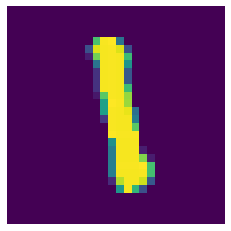

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
#i = 10
i =9
plt.imshow(X_train[:,i].reshape(28,28))
plt.axis("off")
plt.show()
Y_train[:,i]

***Forward Propagation***

###Defining Sigmoid Function

In [0]:
def sigmoid(p):
    s = 1 / (1 + np.exp(-p))
    return s

####Defining Loss Function

In [0]:
def lossfunction(Y, Y_hat):

    Loss_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * Loss_sum

    return L

In [15]:
learning_rate = 0.009

Input_X = X_train
Target_Y = Y_train

new_x = Input_X.shape[0]
d = Input_X.shape[1]

W = np.random.randn(new_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(1000):
    Z = np.matmul(W.T, Input_X) + b
    A = sigmoid(Z)

    cost = lossfunction(Target_Y, A)

    dW = (1/d) * np.matmul(Input_X, (A-Target_Y).T)  #Derivative of weight
    db = (1/d) * np.sum(A-Target_Y, axis=1, keepdims=True) #Derivative of bias

    W = W - learning_rate * dW #Updated Weight
    b = b - learning_rate * db #Updated Bias

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.8643654986173639
Epoch 100 cost:  0.5184028731734912
Epoch 200 cost:  0.48475417746856386
Epoch 300 cost:  0.46976184561372014
Epoch 400 cost:  0.4606073783845699
Epoch 500 cost:  0.45413342695458303
Epoch 600 cost:  0.44915594322980623
Epoch 700 cost:  0.445122570555433
Epoch 800 cost:  0.4417368769237799
Epoch 900 cost:  0.4388231177664497
Final cost: 0.43629300913260566


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

pred = (A>.5)[0,:]
label = (Y_test == 1)[0,:]

print(confusion_matrix(pred, label))

[[8974   29]
 [  46  951]]


In [17]:
print(classification_report(pred, label))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      9003
        True       0.97      0.95      0.96       997

    accuracy                           0.99     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000



###Adding Hidden Layer

In [0]:
new_x = X_train.shape[0]
new_h = 64
learning_rate = 1

####Weights and Bias Initialization

In [0]:
W1 = np.random.randn(new_h, new_x)
b1 = np.zeros((new_h, 1))
W2 = np.random.randn(digits, new_h)
b2 = np.zeros((digits, 1))
#print(W2)

In [0]:
Input_X = X_train
Target_Y = Y_train


In [21]:
for i in range(1000):
    Z1 = np.matmul(W1,Input_X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = lossfunction(Target_Y, A2)

    dZ2 = A2-Target_Y
    #d = first 60000 samples out of 70000
    dW2 = (1./d) * np.matmul(dZ2, A1.T)  #Derivatiove of Weight
    db2 = (1./d) * np.sum(dZ2, axis=1, keepdims=True) #Derivative of Bias

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./d) * np.matmul(dZ1, Input_X.T)
    db1 = (1./d) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final:", cost)

Epoch 0 cost:  14.961926263643658
Epoch 100 cost:  0.8199658166190416
Epoch 200 cost:  0.6159831630322086
Epoch 300 cost:  0.5326631608411468
Epoch 400 cost:  0.4845671180836123
Epoch 500 cost:  0.4525620078128587
Epoch 600 cost:  0.42895108259401454
Epoch 700 cost:  0.4098254394023992
Epoch 800 cost:  0.39398315534585
Epoch 900 cost:  0.3807472028068692
Final cost: 0.3691402242572656


In [22]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

pred= np.argmax(A2, axis=0)
label = np.argmax(Y_test, axis=0)

print(confusion_matrix(pred, label))
print(classification_report(pred, label))

[[ 920    0   15    4    3   19   22    1    6   10]
 [   0 1096    5    3    3    6    2   18    7    3]
 [   5    3  893   23    9    6   29   17   16    6]
 [   8    7   33  874    3   36    2   13   46   12]
 [   1    0   13    3  857   16   11    8   14   73]
 [  22    3    5   39    4  721   27    4   39   14]
 [  12    3   20    5   19   21  856    3   13    3]
 [   6    1   19   10    6   11    0  916   18   37]
 [   5   22   25   36   10   42    9    7  788   17]
 [   1    0    4   13   68   14    0   41   27  834]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1000
           1       0.97      0.96      0.96      1143
           2       0.87      0.89      0.88      1007
           3       0.87      0.85      0.86      1034
           4       0.87      0.86      0.87       996
           5       0.81      0.82      0.81       878
           6       0.89      0.90      0.89       955
           7       0.89      0.89   

***Results above*** show 88% Accuracy

###Increased Epochs

In [30]:
for i in range(2000):
    Z1 = np.matmul(W1,Input_X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = lossfunction(Target_Y, A2)

    dZ2 = A2-Target_Y
    #d = first 60000 samples out of 70000
    dW2 = (1./d) * np.matmul(dZ2, A1.T)  #Derivatiove of Weight
    db2 = (1./d) * np.sum(dZ2, axis=1, keepdims=True) #Derivative of Bias

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./d) * np.matmul(dZ1, Input_X.T)
    db1 = (1./d) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final:", cost)

Epoch 0 cost:  0.36903152173266945
Epoch 100 cost:  0.35886843324142964
Epoch 200 cost:  0.3499099299397331
Epoch 300 cost:  0.34203089072217996
Epoch 400 cost:  0.33496245170098093
Epoch 500 cost:  0.3285667895038364
Epoch 600 cost:  0.32282575603508934
Epoch 700 cost:  0.31753375653819776
Epoch 800 cost:  0.3128004910782973
Epoch 900 cost:  0.30833399925951605
Epoch 1000 cost:  0.3040478568911585
Epoch 1100 cost:  0.2998658805999056
Epoch 1200 cost:  0.29593978271934457
Epoch 1300 cost:  0.2922770264070278
Epoch 1400 cost:  0.28883227257686633
Epoch 1500 cost:  0.28541016266495006
Epoch 1600 cost:  0.2822570495874254
Epoch 1700 cost:  0.27925231997500183
Epoch 1800 cost:  0.2763870835458513
Epoch 1900 cost:  0.273687052840769
Final: 0.27112638886711954


###Using Mini-Batch to improve the Accuracy

In [0]:
def sigmoid(p):
    s = 1. / (1. + np.exp(-p))
    return s

def lossfunction(Y, Y_hat):

    Loss_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * Loss_sum

    return L

def feed_forward(Input_X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], Input_X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

def back_propagate(Input_X, Target_Y, params, cache):

    dZ2 = cache["A2"] - Target_Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [32]:
np.random.seed(138)

# hyperparameters
n_x = X_train.shape[0]
n_h = 64
learning_rate = 4
beta = .9
batch_size = 128
batches = -(-d // batch_size)

# initialization
params = { "W1": np.random.randn(n_h, n_x) * np.sqrt(1. / n_x),
           "b1": np.zeros((n_h, 1)) * np.sqrt(1. / n_x),
           "W2": np.random.randn(digits, n_h) * np.sqrt(1. / n_h),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_h) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# train
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = lossfunction(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = lossfunction(Y_test, cache["A2"])
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))


Epoch 1: training cost = 0.4962803245963952, test cost = 0.48091539453166465


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch 2: training cost = 0.39458462420738116, test cost = 0.40380697954817973
Epoch 3: training cost = 0.341913912642149, test cost = 0.331445194591507
Epoch 4: training cost = 0.3277252587816243, test cost = 0.3229068590873622
Epoch 5: training cost = 0.30976712723064515, test cost = 0.3084515641177357
Epoch 6: training cost = 0.31149298267817516, test cost = 0.30891923277155375
Epoch 7: training cost = 0.2895015530412461, test cost = 0.29453009460204144
Epoch 8: training cost = 0.2945754512986746, test cost = 0.30228857933465053
Epoch 9: training cost = 0.2661874741752893, test cost = 0.27950588662059345


In [33]:
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1053
           1       0.98      0.97      0.98      1140
           2       0.89      0.95      0.92       970
           3       0.92      0.89      0.91      1038
           4       0.96      0.88      0.92      1061
           5       0.85      0.93      0.89       821
           6       0.93      0.95      0.94       944
           7       0.96      0.87      0.91      1133
           8       0.89      0.87      0.88      1000
           9       0.79      0.95      0.86       840

    accuracy                           0.92     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.92      0.92      0.92     10000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


***Results Above*** show accuracy improved from 87% to 92%

###Using Relu trying to improve accuracy

In [0]:
def relu(x):
    y=x
    for i in range(x.shape[0]):
        y[i]=np.maximum(0,x[i])
    return y

def relu_derivative(x):
    y=x
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if(x[i][j]>0.0):
                y[i][j]= 1.0
            else:
                y[i][j]= 0.0
    return y

def lossfunction(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(Input_X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], Input_X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache


def back_propagate(Input_X, Target_Y, params, cache):

    dZ2 = cache["A2"] - Target_Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [35]:
np.random.seed(138)

# Hyperparameters
new_x = X_train.shape[0]
new_h = 64
learning_rate = 1
beta = .9
batch_size = 128
batches = -(-d // batch_size)

# Weight and Bias Initialization
params = { "W1": np.random.randn(new_h, new_x) * np.sqrt(1. / new_x),
           "b1": np.zeros((new_h, 1)) * np.sqrt(1. / new_x),
           "W2": np.random.randn(digits, new_h) * np.sqrt(1. / new_h),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / new_h) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# Network Training
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = lossfunction(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = lossfunction(Y_test, cache["A2"])
    print("Epoch {}: training cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))


Epoch 1: training cost = 0.23153900925903195, test cost = 0.2320361056489676
Epoch 2: training cost = 0.193992468052257, test cost = 0.20890290429013314
Epoch 3: training cost = 0.17285931081743286, test cost = 0.18957740092953707
Epoch 4: training cost = 0.1729438779376178, test cost = 0.18530297489859385
Epoch 5: training cost = 0.14797202937781936, test cost = 0.1676441204285113
Epoch 6: training cost = 0.14133659762671638, test cost = 0.16382576936614224
Epoch 7: training cost = 0.1332719639095687, test cost = 0.15815738738491944
Epoch 8: training cost = 0.12287761763292579, test cost = 0.1463151181322346
Epoch 9: training cost = 0.13078023330310556, test cost = 0.15919833013055423


In [36]:
cache = feed_forward(X_test, params)
pred = np.argmax(cache["A2"], axis=0)
label = np.argmax(Y_test, axis=0)

print(classification_report(pred, label))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1024
           1       0.99      0.98      0.99      1141
           2       0.95      0.96      0.95      1019
           3       0.92      0.95      0.94       975
           4       0.95      0.95      0.95       987
           5       0.93      0.94      0.94       876
           6       0.97      0.96      0.96       961
           7       0.95      0.95      0.95      1028
           8       0.94      0.92      0.93       999
           9       0.92      0.94      0.93       990

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



###Results above show 95% Accuracy

####Confusion Matrix

In [37]:
print(confusion_matrix(pred, label))

[[ 968    0    9    4    5    8   11    3    8    8]
 [   0 1121    5    2    1    1    2    6    1    2]
 [   2    2  978   11    3    3    1   16    2    1]
 [   1    2    5  928    0   16    1    6    9    7]
 [   0    0    4    0  937    1    2    3    6   34]
 [   4    0    0   20    0  827   10    1   11    3]
 [   1    0    6    4    6   13  925    0    6    0]
 [   0    1    8   12    6    7    1  973    7   13]
 [   3    9   17   20    6    8    5    2  918   11]
 [   1    0    0    9   18    8    0   18    6  930]]
